In [2]:
import numpy as np
import os
import numpy as np
import uncertainties as u
from uncertainties import ufloat
from uncertainties.umath import sqrt
from uncertainties.umath import __all__
from uncertainties.umath import *
import uncertainties.unumpy as unp
import scipy.constants
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas # pip install Jinja2
import pint # pip install pint OR conda install pint
units = pint.UnitRegistry()
units.default_format = '~'
import warnings
warnings.simplefilter("ignore")
ulog = u.wrap(np.log)
cm = 1/2.54

def extr_values(np_arr):
    return unp.nominal_values(np_arr)

def extr_sig(np_arr):
    return unp.std_devs(np_arr)

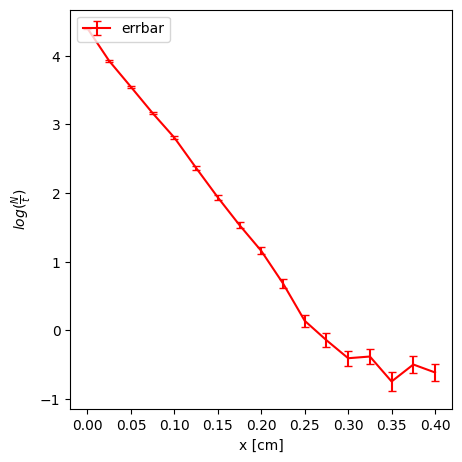

In [9]:
# rho(Al)

rho = u.UFloat(2.69,0.005) #g/cm^3

N_bg = u.UFloat(73,np.sqrt(73)) #anzahl in 120 sekunden

# Import meas 3
X_dicke_meas, t_seconds_meas, N_anzahl_meas = np.genfromtxt(os.path.join(os.getcwd(), "meas_3.csv"), delimiter=',', skip_header=1, unpack=True)

u_x = np.array([u.ufloat(X_val, 0.5) for X_val in X_dicke_meas])
u_t = np.array([u.ufloat(t_val, 2/1000) for t_val in t_seconds_meas])
u_N = np.array([u.ufloat(N_val, np.sqrt(N_val)) for N_val in N_anzahl_meas])

#Berechnung N efff
u_Nef = u_N-N_bg

#ln N/t
#u_lnNt = u.wrap(np.log)(u_N/u_t)
u_lnNt = np.array([ulog(u_N[i]/u_t[i]) for i in range(0, len(u_N))])

#Umwandlung in cm
u_x_cm = u_x/10

#rho*x
rho_x = rho * u_x_cm

def graph_1(u_x, u_y, xlabel='xlabel', ylabel='ylabel'):
    fig, ax = plt.subplots(1,1,figsize=(12*cm, 12*cm))
    X, Y, sig_Y = extr_values(u_x), extr_values(u_y), extr_sig(u_y)
    #ax.plot(x_axis_spaced, result.slope*x_axis_spaced + result.intercept, 'r--', label='label')
    ax.errorbar(X, Y, yerr=sig_Y, linestyle='-', color='red', capsize=3, label='errbar')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('graph1.png', dpi=500)
    plt.show()


graph_1(u_x_cm, u_lnNt, xlabel="x [cm]", ylabel=r'$log(\frac{N}{t})$')